In [1]:
# 数据分析的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/LogiReg_data.txt',header=None,names=['exam1','exam2','admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.shape

(100, 3)

In [4]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000297F5EF7EB8>,
      dtype=object)

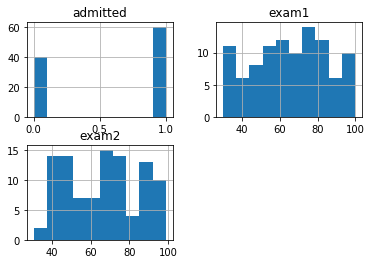

In [5]:
data.hist()

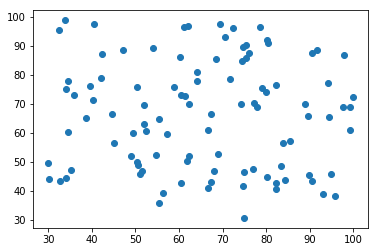

In [6]:
plt.scatter(data['exam1'],data['exam2'])

In [7]:
negative = data[data['admitted']==0]
positive = data[data['admitted']==1]

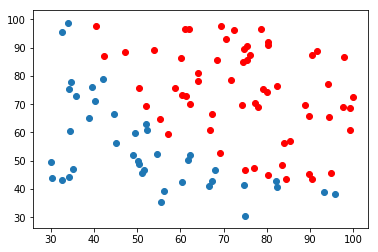

In [8]:
plt.scatter(positive['exam1'],positive['exam2'],c='r')
plt.scatter(negative['exam1'],negative['exam2'])

# 建立模型

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()

In [11]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
X = data[['exam1','exam2']]
y = data['admitted']

In [13]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
sita = lr.coef_
sita

array([[0.03844482, 0.03101855]])

In [15]:
b = lr.intercept_
b

array([-3.89977794])

In [22]:
lr.predict([[58,88],[51,62]])

array([1, 0], dtype=int64)

In [23]:
lr.predict_proba([[51,61]])

array([[0.51173811, 0.48826189]])

In [24]:
xx =np.array([[51,61]])

In [25]:
zz = xx.dot(sita.T) + b

In [26]:
yy = 1/(1+np.exp(-zz))
yy

array([[0.48826189]])

In [27]:
xx1 = np.linspace(20,100,100)
xx2 =( -b - sita[0,0]*xx1 )/ sita[0,1]

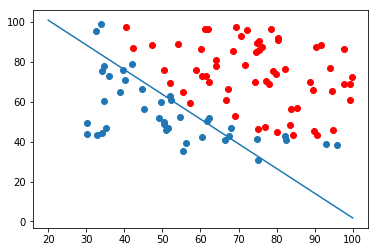

In [28]:
plt.scatter(positive['exam1'],positive['exam2'],c='r')
plt.scatter(negative['exam1'],negative['exam2'])
plt.plot(xx1,xx2)

In [29]:
X = X.values

In [30]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [31]:
xx

array([[ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       ...,
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245]])

In [32]:
yy.ravel().shape
xx.ravel()

array([ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
       100.29882245, 100.31882245])

In [33]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 29.55882245,  30.10326323],
       [ 29.57882245,  30.10326323],
       [ 29.59882245,  30.10326323],
       ...,
       [100.27882245,  99.36326323],
       [100.29882245,  99.36326323],
       [100.31882245,  99.36326323]])

In [48]:
xx

array([[ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       ...,
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245],
       [ 29.55882245,  29.57882245,  29.59882245, ..., 100.27882245,
        100.29882245, 100.31882245]])

In [34]:
#pcolormesh函数将xx,yy两个网格矩阵和对应的预测结果Z绘制在图片上
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

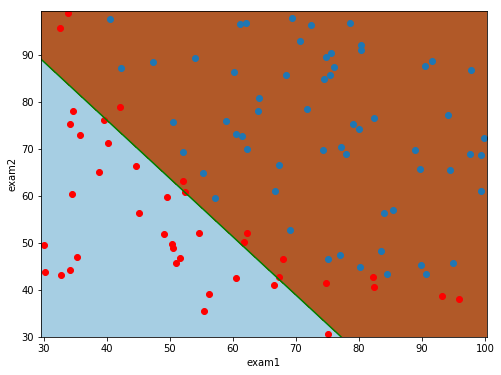

In [35]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))

#调用pcolormesh()函数将xx、yy两个网格矩阵和对应的预测结果Z绘制在图片上，
#可以发现输出为三个颜色区块，分布表示分类的三类区域。
#cmap=plt.cm.Paired表示绘图样式选择Paired主题。输出的区域如下图所示：
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
#绘制散点图
plt.scatter(positive['exam1'],positive['exam2'])
plt.scatter(negative['exam1'],negative['exam2'],c='r')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 两种可视化方法对比，可见，决策边界是重合的
# plt.plot(xx1,xx2,c='g')